In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal

import seaborn as sns
sns.set()

In [2]:
def affiche_pdf(cov,texte,ax):
    # Affichage de la PDF

    # La PDF est centrée à l'origine
    mean = [0.,0.]
    
    # La PDF est calculée sur un grillage (x,y) à l'intérieur de la zone d'intérêt
    x_min, x_max, y_min, y_max = -2., 2., -2., 2.
    h = 0.01
    x, y = np.mgrid[x_min:x_max:h, y_min:y_max:h]
    pos = np.dstack((x, y))
    rv = multivariate_normal(mean,cov)

    # Affichage de contours remplis
    cm = plt.get_cmap('viridis')
    ax.contourf(x, y, rv.pdf(pos),cmap=cm)

    # Affichage du centre de la PDF
    ax.text(0., 0., '$\mu$', horizontalalignment='center', verticalalignment='center', fontsize=20, color='red')

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.99)
    ax.text(0.05, 0.95, texte[0], transform=ax.transAxes, fontsize=14,
            verticalalignment='top', bbox=props)

    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlabel('$x_{1}$',fontsize=18)
    ax.set_ylabel('$x_{2}$',rotation=0,fontsize=18)
    ax.yaxis.set_label_coords(-0.1,0.5)
    ax.xaxis.set_label_coords(0.5, -0.05)

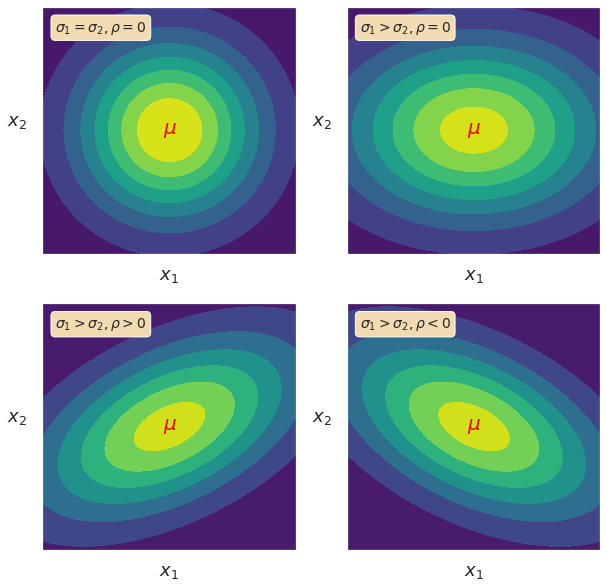

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(10,10))


cov = [(1., 0.), (0., 1.)]
texte0 = r'$\sigma_{1} =  \sigma_{2}, \rho = 0$'
texte1 = r'$\begin{pmatrix} sigma_{1}^2 & 0 \\ 0 & sigma_{2}^2 \end{pmatrix}$'
texte2 = r'$Cov(x_{1},x_{2})=0, Var(x_{1}) = Var(x_{2})$'
texte = [texte0, texte1, texte2]
affiche_pdf(cov,texte,ax1)

cov = [(2., 0.), (0., 1.)]
texte0 = r'$\sigma_{1} >  \sigma_{2}, \rho = 0$'
texte1 = r'$\begin{pmatrix} sigma_{1}^2 & 0 \\ 0 & sigma_{2}^2 \end{pmatrix}$'
texte2 = r'$Cov(x_{1},x_{2})=0$'
texte = [texte0, texte1, texte2]
affiche_pdf(cov,texte,ax2)

cov = [(2., 0.7), (0.7, 1.)]
texte0 = r'$\sigma_{1} >  \sigma_{2}, \rho > 0$'
texte1 = r'$\begin{pmatrix} sigma_{1}^2 & \rho\sigma_{1}\sigma_{2}  \\ \rho\sigma_{1}\sigma_{2} & sigma_{2}^2 \end{pmatrix}$'
texte2 = r'$Cov(x_{1},x_{2}) > 0, Var(x_{1}) > Var(x_{2})$'
texte = [texte0, texte1, texte2]
affiche_pdf(cov,texte,ax3)

cov = [(2., -0.7), (-0.7, 1.)]
texte0 = r'$\sigma_{1}  > \sigma_{2}, \rho < 0$'
texte1 = r'$\begin{pmatrix} sigma_{1}^2 & \rho\sigma_{1}\sigma_{2}  \\ \rho\sigma_{1}\sigma_{2} & sigma_{2}^2 \end{pmatrix}$'
texte2 = r'$Cov(x_{1},x_{2})<0$'
texte = [texte0, texte1, texte2]
affiche_pdf(cov,texte,ax4)

plt.savefig("Figure_10_41.svg", format="svg")
plt.show()